In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train (1).csv")

In [3]:
data.head(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [4]:
#Checking null values
data.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [5]:
#removing null valued fields 
data = data.drop(['Unnamed: 17', 'Unnamed: 18'], axis=1)

In [6]:
data.shape

(3198, 17)

In [7]:
data["category_id"].describe()

count     3192
unique      17
top         24
freq       786
Name: category_id, dtype: object

In [8]:
data['category_id'] = data['category_id'].fillna(data['category_id'].mode()[0])

In [9]:
#removing categorical data
data = data.dropna(subset=['channel_title', 'title', 'tags', 'description'])

In [10]:
data.shape

(3008, 17)

In [11]:
data.isnull().sum()

Video_id                  0
category_id               0
channel_title             0
subscriber               20
title                     0
tags                      0
description               0
Trend_day_count           0
Tag_count                 1
Trend_tag_count           1
comment_count             0
comment_disabled          0
like dislike disabled     0
likes                     0
dislike                   0
tag appered in title      1
views                     0
dtype: int64

In [12]:
data['subscriber'] = data['subscriber'].fillna(data['subscriber'].mean())

In [13]:
data['tag appered in title'] = data['tag appered in title'].fillna(data['tag appered in title'].mode()[0])

In [14]:
data['Tag_count'] = data['Tag_count'].fillna(data['Tag_count'].mode()[0])
data['Trend_tag_count'] = data['Trend_tag_count'].fillna(data['Trend_tag_count'].mode()[0])

In [15]:
data.isnull().sum()

Video_id                 0
category_id              0
channel_title            0
subscriber               0
title                    0
tags                     0
description              0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64

In [16]:
data.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title        bool
views                     object
dtype: object

In [17]:
data["Trend_tag_count"] = data["Trend_tag_count"].replace('>', data["Trend_tag_count"].mode()[0])

In [18]:
data["Trend_tag_count"].unique()

array(['6', '1', '3', '5', '7', '2', '4', '9903'], dtype=object)

In [19]:
data["Tag_count"] = data["Tag_count"].astype("int64")
data["Trend_tag_count"] = data["Trend_tag_count"].astype("int64")
#data["comment_count"] = data["comment_count"].astype("int64")
data["likes"] = data["likes"].astype("int64")
data["dislike"] = data["dislike"].astype("int64")
data["views"] = data["views"].astype("int64")

In [20]:
data["comment_disabled"].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [21]:
data.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                  int64
Trend_tag_count            int64
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                      int64
dislike                    int64
tag appered in title        bool
views                      int64
dtype: object

In [22]:
data.head(2)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870


In [94]:
da=data[data['views'] >= 7000000.0 ]
da[['Video_id','views']]

,Video_id,views
29,ZUW72GLK1,989873537
1476,LWN89WY^61,100360000
1882,HKB85DYN73,30039119
2379,AJB53GU]16,598795075


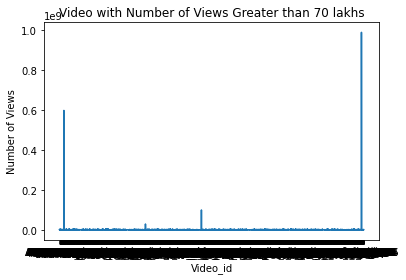

In [95]:
#Video with Number of Views Greater than 70 lakhs
sns.lineplot(x=data['Video_id'], y =data['views'])
plt.title('Video with Number of Views Greater than 70 lakhs')
plt.ylabel('Number of Views')
plt.xlabel('Video_id')
plt.show()

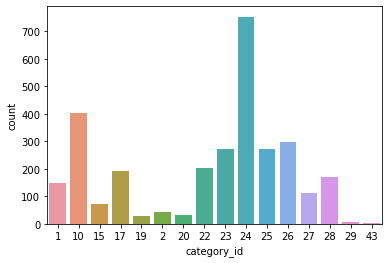

In [23]:
#Most videos of which category?
sns.countplot(data["category_id"])

C:\Users\Jadon\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


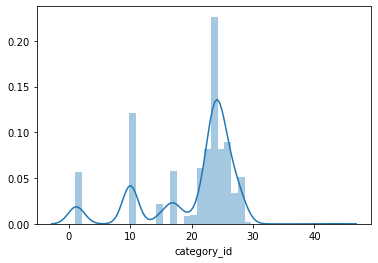

In [24]:
sns.distplot(data['category_id'])

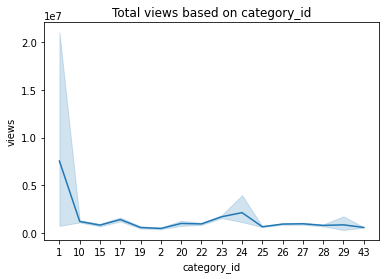

In [25]:
#Relation between category_id and views
sns.lineplot(x = data['category_id'], y = data['views'])
plt.title('Total views based on category_id')
plt.show()

In [26]:
df1 = data[["subscriber", "comment_count", "likes", "dislike", "views"]]
df1.corr()

,subscriber,likes,dislike,views
subscriber,1.000000,-0.008892,-0.019971,0.006852
likes,-0.008892,1.000000,0.290054,-0.007463
dislike,-0.019971,0.290054,1.000000,-0.025656
views,0.006852,-0.007463,-0.025656,1.000000


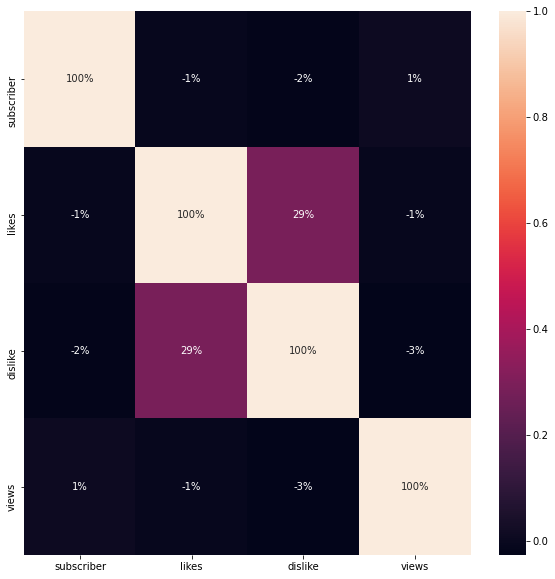

In [27]:
#Check the correlation between views and subscriber, comment_count, likes, dislike
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, fmt=".0%")

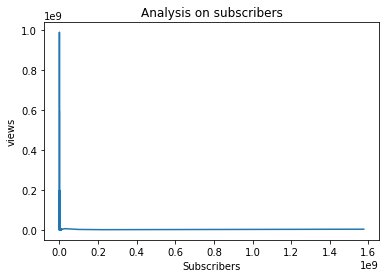

In [28]:
sns.lineplot(x = data['subscriber'], y= data['views'])
plt.title('Analysis on subscribers')
plt.ylabel('views')
plt.xlabel('Subscribers')
plt.show()

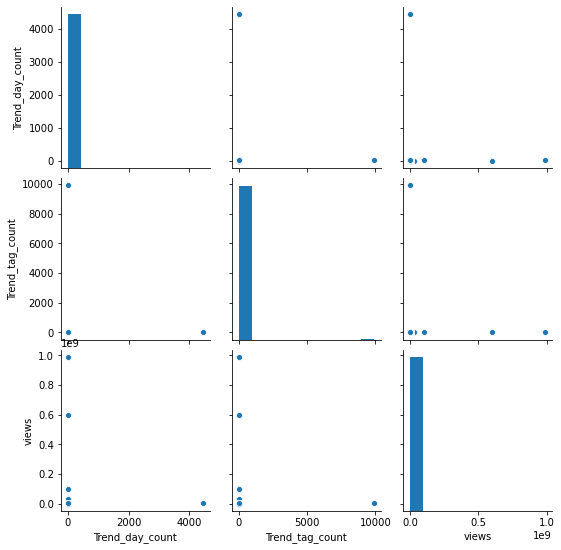

In [90]:
data2 = data[['Trend_day_count','Trend_tag_count', 'views']]
sns.pairplot(data2)

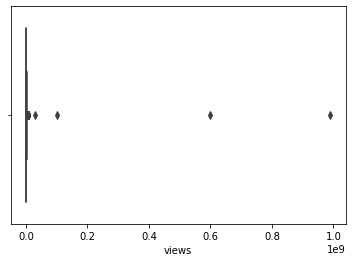

In [86]:
sns.boxplot(data['views'])

<BarContainer object of 3008 artists>

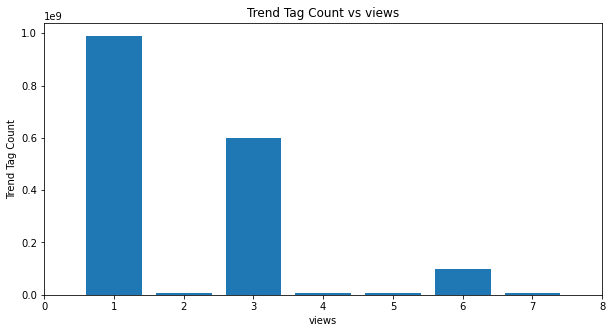

In [82]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.xlabel('views')
plt.ylabel('Trend Tag Count')
plt.title('Trend Tag Count vs views')
plt.xlim([0,8])
ax.bar(data['Trend_tag_count'], data['views'])

C:\Users\Jadon\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jadon\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jadon\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in great

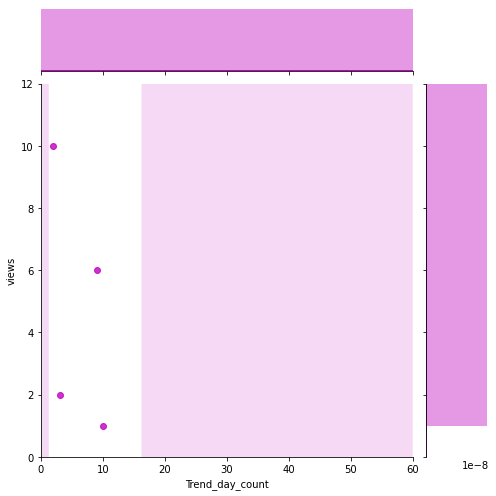

In [98]:
sns.jointplot(x="Trend_day_count", y="views", data=data,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [30]:
data3 = data.pivot_table(values = ['views','subscriber'], index = ['category_id', 'tag appered in title'], aggfunc = np.sum)

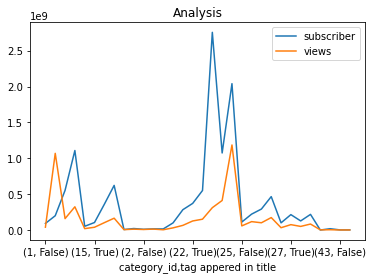

In [72]:
data3.plot(kind="line")
plt.title("Analysis")
plt.show()

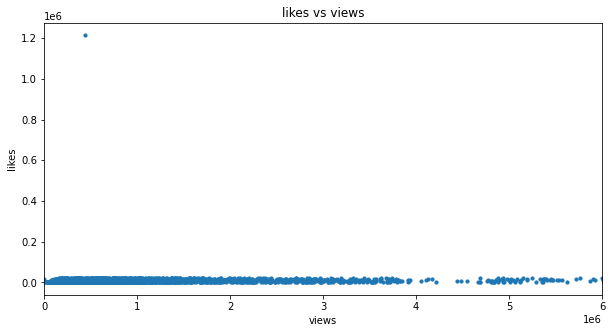

In [57]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.xlabel('views')
plt.ylabel('likes')
plt.title('likes vs views')
plt.xlim([0,6000000])
ax.scatter(data['views'], data['likes'], s=10)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.xlabel('views')
plt.ylabel('dislikes')
plt.title('dislikes vs views')
plt.xlim([0,6000000])
ax.scatter(data['views'], data['dislike'], s=10)

In [60]:
data4 = data.pivot_table(values = ['views'], index = ['comment_disabled', 'like dislike disabled'], aggfunc = np.sum)
data4

views
comment_disabled like dislike disabled            
FALSE            FALSE                   663927875
                 TRUE                    198433271
TRUE             FALSE                  2459576730
                 TRUE                   1608304133

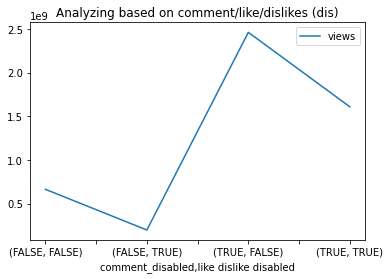

In [77]:
data4.plot(kind="line")
plt.title("Analyzing based on comment/like/dislikes (dis)")
plt.show()

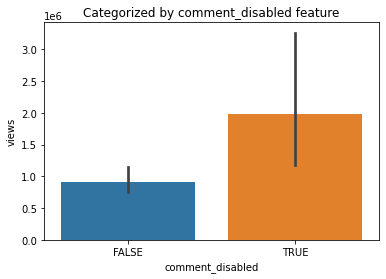

In [79]:
sns.barplot(x="comment_disabled", y="views", data=data)
plt.title("Categorized by comment_disabled feature")
plt.show()